In [1]:
#importar 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#ler dados
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
dados_cancer = cancer['data']

In [7]:
nome_colunas_dados_cancer = cancer['feature_names']

In [8]:
cancer_df = pd.DataFrame(dados_cancer, columns=nome_colunas_dados_cancer)

In [9]:
cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [10]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [11]:
# normalização dos dados é importante antes de aplicar o PCA
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [174]:
scaler.fit(cancer_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [175]:
dados_cancer_normalizado = scaler.transform(cancer_df)

In [176]:
# verificando quantidade de dados em linhas e colunas
dados_cancer_normalizado.shape

(569, 30)

In [16]:
# Vamos aplicar o PCA

In [178]:
# import
from sklearn.decomposition import PCA

In [218]:
pca = PCA(n_components=2)

In [219]:
pca.fit(dados_cancer_normalizado)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [220]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [221]:
componentes_pca = pca.transform(dados_cancer_normalizado)

In [222]:
componentes_pca.shape

(569, 2)

In [185]:
dados_cancer_normalizado.shape

(569, 30)

In [186]:
dados_cancer_normalizado

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [187]:
primeiro_componente_principal=componentes_pca[:,0]
primeiro_componente_principal.shape

(569,)

In [188]:
segundo_componente_principal=componentes_pca[:,1]
segundo_componente_principal.shape

(569,)

In [189]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Text(0, 0.5, 'Segundo componente principal')

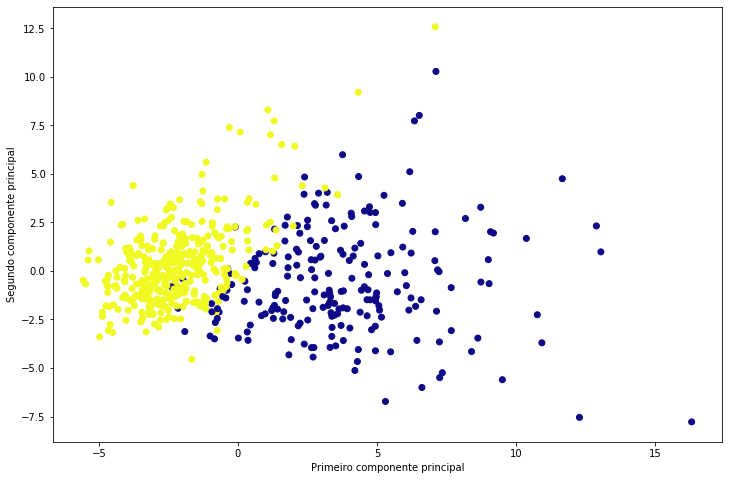

In [190]:
plt.figure(figsize=(12,8))
plt.scatter(primeiro_componente_principal, segundo_componente_principal, c=cancer['target'], cmap='plasma')
plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo componente principal')

In [29]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [195]:
pca.components_.shape

(2, 30)

In [196]:
nome_das_colunas=cancer['feature_names']

In [223]:
componentes_pca_df = pd.DataFrame(pca.components_, columns=nome_das_colunas)

In [224]:
componentes_pca_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.218902      0.103725        0.227537   0.220995         0.142590   
1    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.239285        0.258400             0.260854       0.138167   
1          0.151892        0.060165            -0.034768       0.190349   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.064363  ...      0.227997       0.104469         0.236640   
1                0.366575  ...     -0.219866      -0.045467        -0.199878   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.224871          0.127953           0.210096         0.228768   
1   -0.219352          0.172304           0.143593         0.097964   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.250886        0.122905                 0.131784  
1             -0.008257        0.141883                 0.275339  

[2 rows x 30 columns]

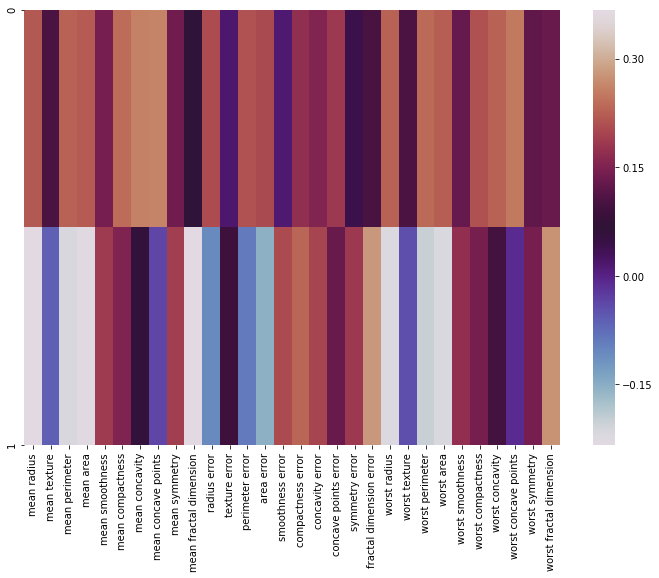

In [225]:
plt.figure(figsize=(12,8))
sns.heatmap(componentes_pca_df, cmap='twilight')

In [226]:
pca.n_components

2

In [227]:
pca.n_features_

30

In [228]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

In [203]:
help(pca)

Help on PCA in module sklearn.decomposition.pca object:

class PCA(sklearn.decomposition.base._BasePCA)
 |  PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Para

In [229]:
np.sum(pca.explained_variance_ratio_)

0.6324320765155956

In [230]:
componentes_pca_df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.218902      0.103725        0.227537   0.220995         0.142590   
1    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.239285        0.258400             0.260854       0.138167   
1          0.151892        0.060165            -0.034768       0.190349   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.064363  ...      0.227997       0.104469         0.236640   
1                0.366575  ...     -0.219866      -0.045467        -0.199878   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.224871          0.127953           0.210096         0.228768   
1   -0.219352          0.172304           0.143593         0.097964   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.250886        0.122905                 0.131784  
1             -0.008257        0.141883                 0.275339  

[2 rows x 30 columns]

In [231]:
fator=0.01
aux=componentes_pca_df.T
aux[(aux< -factor) | (aux >factor)].dropna().T

mean radius  mean perimeter  mean area  mean compactness  area error  \
0     0.218902        0.227537   0.220995          0.239285    0.202870   
1    -0.233857       -0.215181  -0.231077          0.151892   -0.152293   

   compactness error  concavity error  worst radius  worst perimeter  \
0           0.170393         0.153590      0.227997         0.236640   
1           0.232716         0.197207     -0.219866        -0.199878   

   worst area  
0    0.224871  
1   -0.219352

explained_variance_ratio_ 0.95156881433543


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.218902      0.103725        0.227537   0.220995         0.142590   
1    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   
2    -0.008531      0.064550       -0.009314   0.028700        -0.104292   
3     0.041409     -0.603050        0.041983   0.053434         0.159383   
4     0.037786     -0.049469        0.037375   0.010331        -0.365089   
5     0.018741     -0.032179        0.017308  -0.001888        -0.286374   
6    -0.124088      0.011399       -0.114477  -0.051653        -0.140669   
7    -0.007452      0.130675       -0.018687   0.034674        -0.288975   
8    -0.223110      0.112699       -0.223739  -0.195586         0.006425   
9     0.095487      0.240933        0.086386   0.074956        -0.069292   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.239285        0.258400             0.260854       0.138167   
1          0.151892        0.060165            -0.034768       0.190349   
2         -0.074092        0.002734            -0.025564      -0.040240   
3          0.031795        0.019123             0.065336       0.067125   
4          0.011704        0.086375            -0.043861      -0.305941   
5         -0.014131       -0.009344            -0.052050       0.356458   
6          0.030918       -0.107520            -0.150482      -0.093891   
7         -0.151396       -0.072827            -0.152322      -0.231531   
8         -0.167841        0.040591            -0.111972       0.256040   
9          0.012936       -0.135602             0.008054       0.572070   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.064363  ...      0.227997       0.104469         0.236640   
1                0.366575  ...     -0.219866      -0.045467        -0.199878   
2               -0.022574  ...     -0.047507      -0.042298        -0.048547   
3                0.048587  ...      0.015417      -0.632808         0.013803   
4               -0.044424  ...     -0.004407      -0.092883         0.007454   
5               -0.119431  ...     -0.000291      -0.050008         0.008501   
6                0.295760  ...     -0.009710       0.009871        -0.000446   
7               -0.177121  ...      0.042619       0.036252         0.030559   
8               -0.123741  ...     -0.112142       0.103342        -0.109614   
9                0.081103  ...      0.077362       0.029552         0.050509   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.224871          0.127953           0.210096         0.228768   
1   -0.219352          0.172304           0.143593         0.097964   
2   -0.011902         -0.259798          -0.236076        -0.173057   
3    0.025895          0.017652          -0.091328        -0.073951   
4   -0.027391         -0.324435           0.121804         0.188519   
5   -0.025164         -0.369255           0.047706         0.028379   
6    0.067832         -0.108831           0.140473        -0.060488   
7    0.079394          0.205852           0.084020         0.072468   
8   -0.080733          0.112316          -0.100678         0.161909   
9    0.069921         -0.128305          -0.172134        -0.311638   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.250886        0.122905                 0.131784  
1             -0.008257        0.141883                 0.275339  
2             -0.170344       -0.271313                -0.232791  
3              0.006007       -0.036251                -0.077053  
4              0.043332       -0.244559                 0.094423  
5             -0.030873        0.498927                -0.080224  
6             -0.167967       -0.018491                 0.374658  
7             -0.036171        0.228225                 0.048361  
8              0.060489        0.064638                -0.134175  
9      

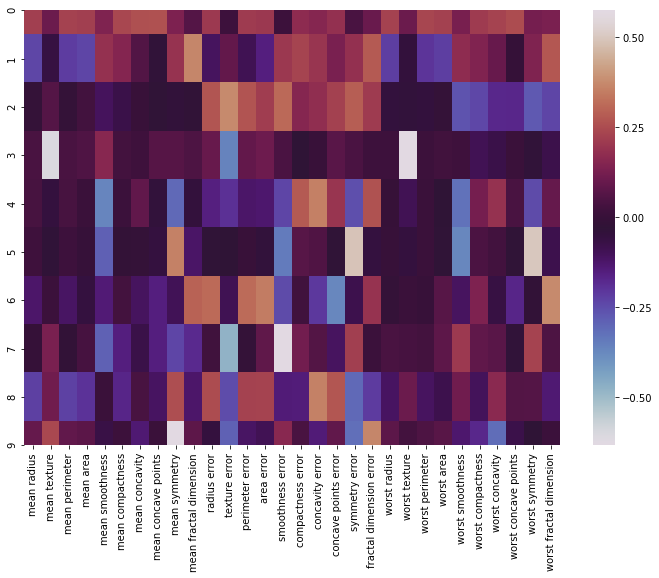

In [451]:
pca = PCA(n_components=10)
pca.fit(dados_cancer_normalizado)
componentes_pca = pca.transform(dados_cancer_normalizado)
componentes_pca_df = pd.DataFrame(pca.components_, columns=cancer.feature_names)

print('explained_variance_ratio_',np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(12,8))
sns.heatmap(componentes_pca_df, cmap='twilight')
fator=0.1
componentes_pca_df
#aux=componentes_pca_df.T
#aux[(aux< -factor) | (aux >factor)].T

In [516]:
pca = PCA(n_components=3)
pca.fit(dados_cancer_normalizado)
componentes_pca = pca.transform(dados_cancer_normalizado)
#X_rec = pca.inverse_transform(componentes_pca)
#componentes_pca_df = pd.DataFrame(componentes_pca)
componentes_pca_df = pd.DataFrame(pca.components_, columns=cancer.feature_names)
#print('componentes_pca.shape', componentes_pca.shape)
#print('\ncomponentes_pca_df',componentes_pca_df)
#print('\ndados_cancer_normalizado',dados_cancer_normalizado)
#print('\nX_rec',X_rec)





#plt.figure(figsize=(12,8))
#sns.heatmap(componentes_pca_df, cmap='twilight')

#print('explained_variance_ratio_',pca.explained_variance_ratio_)

#print('sum explained_variance_ratio_',np.sum(pca.explained_variance_ratio_))


#print(componentes_pca_df.sum().sort_values(ascending=False))

print('\n\nPC 0\n',componentes_pca_df[0:1].max().sort_values(ascending=False))
print('\n\nPC 1\n',componentes_pca_df[1:2].max().sort_values(ascending=False))
print('\n\nPC 2\n',componentes_pca_df[2:3].max().sort_values(ascending=False))

#componentes_pca_df[0:1].max().sort_values(ascending=False).apply(lambda x : x > 0)
#componentes_pca_df[1:2].max().sort_values(ascending=False).apply(lambda x : x > 0)
#componentes_pca_df[2:3].max().sort_values(ascending=False).apply(lambda x : x > 0)


#fator=0.01
#aux=componentes_pca_df.T
#aux[(aux >factor)].dropna().T



PC 0
 mean concave points        0.260854
mean concavity             0.258400
worst concave points       0.250886
mean compactness           0.239285
worst perimeter            0.236640
worst concavity            0.228768
worst radius               0.227997
mean perimeter             0.227537
worst area                 0.224871
mean area                  0.220995
mean radius                0.218902
perimeter error            0.211326
worst compactness          0.210096
radius error               0.205979
area error                 0.202870
concave points error       0.183417
compactness error          0.170393
concavity error            0.153590
mean smoothness            0.142590
mean symmetry              0.138167
worst fractal dimension    0.131784
worst smoothness           0.127953
worst symmetry             0.122905
worst texture              0.104469
mean texture               0.103725
fractal dimension error    0.102568
mean fractal dimension     0.064363
symmetry error      

In [476]:
valores_componentes_pca_df = pd.DataFrame(componentes_pca, columns='PC0 PC1 PC2'.split())
print(valores_componentes_pca_df.max())
print(valores_componentes_pca_df.min())

PC0    16.319233
PC1    12.573194
PC2    10.112424
dtype: float64
PC0   -5.565736
PC1   -7.775853
PC2   -4.880361
dtype: float64


Text(0, 0.5, 'Segundo componente principal')

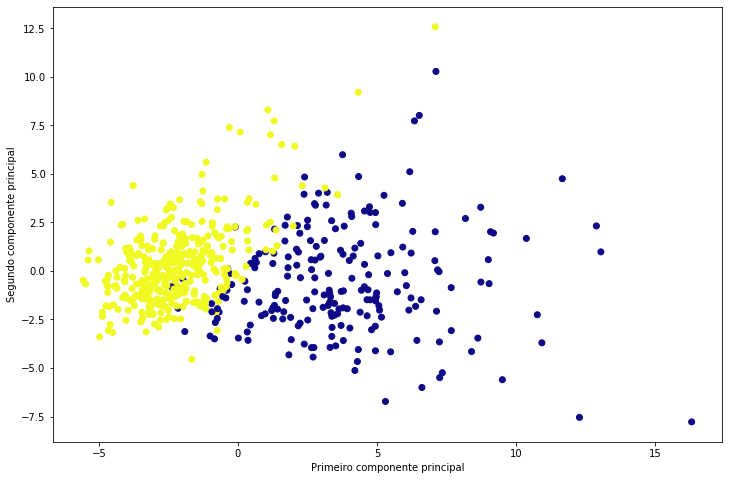

In [475]:
plt.figure(figsize=(12,8))
plt.scatter(valores_componentes_pca_df['PC0'], valores_componentes_pca_df['PC1'], c=cancer['target'], cmap='plasma')
plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo componente principal')


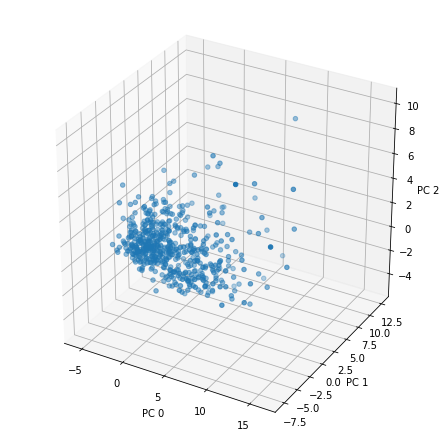

In [450]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

ax.scatter(componentes_pca[:,0], componentes_pca[:,1], componentes_pca[:,2], marker='o')
ax.set_xlabel('PC 0')
ax.set_ylabel('PC 1')
ax.set_zlabel('PC 2')


plt.show()
